In [14]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

In [13]:
boston = load_boston()
X, y = boston['data'], boston['target']

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
i = 1
sample = X[i]

for i, name in enumerate(boston['feature_names']):
    print(i, name)

0 CRIM
1 ZN
2 INDUS
3 CHAS
4 NOX
5 RM
6 AGE
7 DIS
8 RAD
9 TAX
10 PTRATIO
11 B
12 LSTAT


In [99]:
val_ratio = 0.2
train_rows = np.random.rand(y.size) > val_ratio

# X_ = X[:, [5, 7, 12]]
train_X, train_y = X[train_rows], y[train_rows]
val_X, val_y = X[~train_rows], y[~train_rows]

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [101]:
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
booster = GradientBoostingRegressor()
linear = LinearRegression()

In [102]:
tree.fit(train_X, train_y)
forest.fit(train_X, train_y)
booster.fit(train_X, train_y)
linear.fit(train_X, train_y)

tree_pred = tree.predict(val_X)
forest_pred = forest.predict(val_X)
booster_pred = booster.predict(val_X)
linear_pred = linear.predict(val_X)

In [103]:
tree_mae = np.mean(abs(tree_pred - val_y))
forest_mae = np.mean(abs(forest_pred - val_y))
booster_mae = np.mean(abs(booster_pred - val_y))
linear_mae = np.mean(abs(linear_pred - val_y))


print(f'Tree: {tree_mae:.2f}')
print(f'Linear: {linear_mae:.2f}')
print(f'Forest: {forest_mae:.2f}')
print(f'Booster: {booster_mae:.2f}')

Tree: 3.17
Linear: 3.59
Forest: 2.36
Booster: 2.29


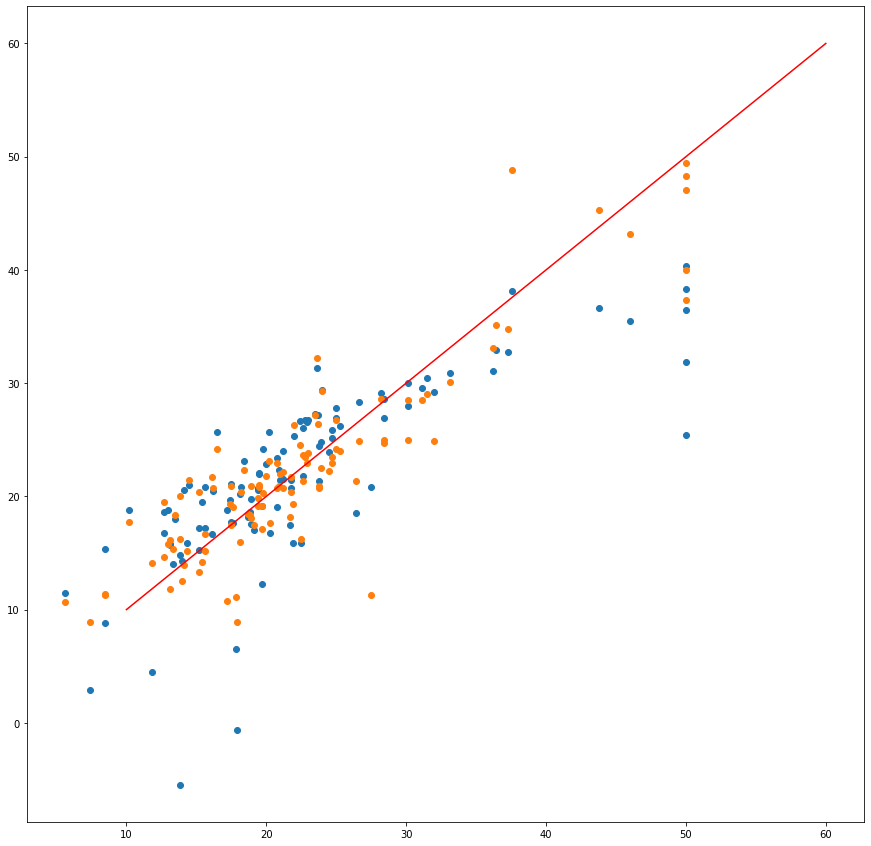

In [78]:
plt.figure(figsize=(15, 15))
plt.scatter(val_y, linear_pred)
plt.scatter(val_y, booster_pred)
plt.plot([10, 60], [10, 60], 'r')

In [79]:
importances = {f: i for f, i in zip(boston['feature_names'], booster.feature_importances_)}
keys = sorted(importances, key=importances.get, reverse=True)

for key in keys:
    print(key, importances[key])

CRIM 0.468698067350935
INDUS 0.4163575892492761
ZN 0.11494434339978886


In [91]:
linear.coef_

array([ 4.79354243, -0.38688296, -0.73681096])